## Подключение библиотек

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


## Чтение данных и их обработка

In [3]:
dataframe = pd.read_json('data.json')
dataframe

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [5]:
unique_ingredients = []
for string in dataframe['ingredients']:
    for ingredient in string:
        unique_ingredients.append(ingredient)
unique_ingredients = list(set(unique_ingredients))
len(unique_ingredients) 

6714

In [6]:
dataframe.loc[:, unique_ingredients] = 0

/var/folders/0z/9wxt0w7x4n3_q41cm5vrc2340000gn/T/ipykernel_22993/158601026.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.loc[:, unique_ingredients] = 0


In [7]:
dataframe

,id,cuisine,ingredients,vegetable demi-glace,chinese buns,millet,onion soup,zinfandel,brown sugar,spring water,...,veggie patties,quick-cooking barley,five spice,cockles,vegetable oil cooking spray,green olives,vine ripened tomatoes,green lentil,V8 Juice,black onion seeds
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
for j, line in enumerate(dataframe['ingredients']):
    for ingredient in line:
        dataframe.loc[j, ingredient] = 1

In [9]:
dataframe

,id,cuisine,ingredients,vegetable demi-glace,chinese buns,millet,onion soup,zinfandel,brown sugar,spring water,...,veggie patties,quick-cooking barley,five spice,cockles,vegetable oil cooking spray,green olives,vine ripened tomatoes,green lentil,V8 Juice,black onion seeds
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dataframe = dataframe.drop(columns='ingredients')

In [11]:
dataframe

,id,cuisine,vegetable demi-glace,chinese buns,millet,onion soup,zinfandel,brown sugar,spring water,ngo gai,...,veggie patties,quick-cooking barley,five spice,cockles,vegetable oil cooking spray,green olives,vine ripened tomatoes,green lentil,V8 Juice,black onion seeds
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Анализ данных

In [12]:
dataframe['cuisine'].nunique()

20

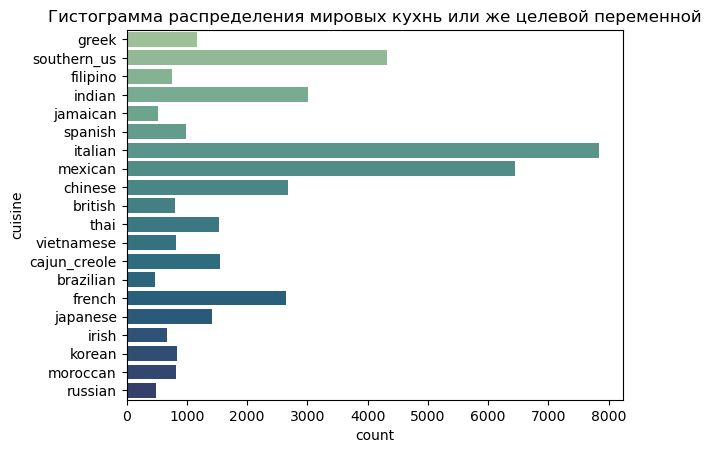

In [13]:
plt.title('Гистограмма распределения мировых кухнь или же целевой переменной')
sns.countplot(dataframe, y='cuisine', palette="crest");

Распределение таргета отличается от дискретного равномерного, то есть классы не сбалансированы.

Также будет интересно узнать самые частоиспользуемые ингредиенты во всём dataframe.

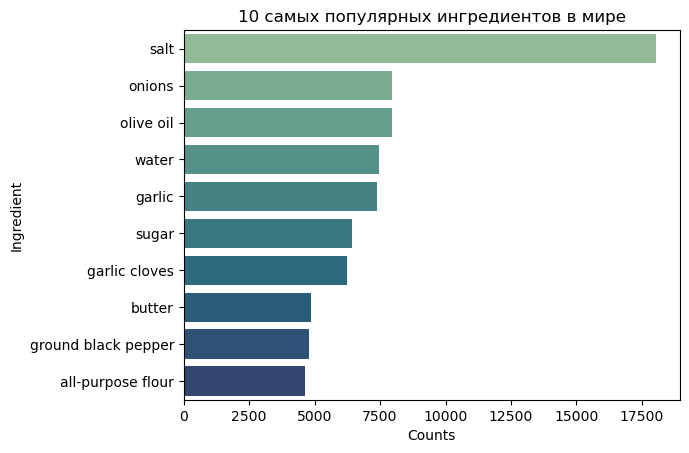

In [14]:
plt.title('10 самых популярных ингредиентов в мире')
sns.barplot(
    data=pd.DataFrame(
        {'Ingredient':dataframe.drop(columns=['id', 'cuisine']).sum(axis=0).sort_values(ascending=False).head(10).index,
         'Counts': dataframe.drop(columns=['id', 'cuisine']).sum(axis=0).sort_values(ascending=False).head(10).values}
        ),
    x='Counts',
    y='Ingredient',
    palette='crest');

Самым популярным ингредиентом в мире является соль.

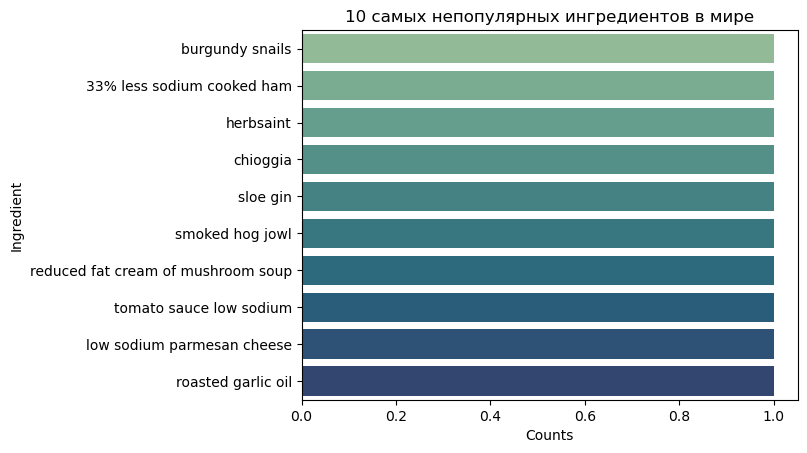

In [17]:
plt.title('10 самых непопулярных ингредиентов в мире')
sns.barplot(
    data=pd.DataFrame(
        {'Ingredient':dataframe.drop(columns=['id', 'cuisine']).sum(axis=0).sort_values(ascending=False)[-10:].index,
         'Counts': dataframe.drop(columns=['id', 'cuisine']).sum(axis=0).sort_values(ascending=False)[-10:].values}
        ),
    x='Counts',
    y='Ingredient',
    palette='crest');

Также можно взять из dataframe только определенные кухни мира, и посмотреть там самые популярные ингредиенты.

Для примера рассмотрим индийскую, китайскую, японскую и испанскую кухню.

In [18]:
spanish_cuisine = dataframe[dataframe['cuisine'] == 'italian'].drop(columns=['id', 'cuisine']).sum(axis=0)\
    .sort_values(ascending=False).head(10)
spanish_cuisine = pd.DataFrame({'ingredient': spanish_cuisine.index, 'counts': spanish_cuisine.values})
spanish_cuisine

,ingredient,counts
0,salt,3454
1,olive oil,3111
2,garlic cloves,1619
3,grated parmesan cheese,1579
4,garlic,1471
5,ground black pepper,1444
6,extra-virgin olive oil,1362
7,onions,1240
8,water,1052
9,butter,1029


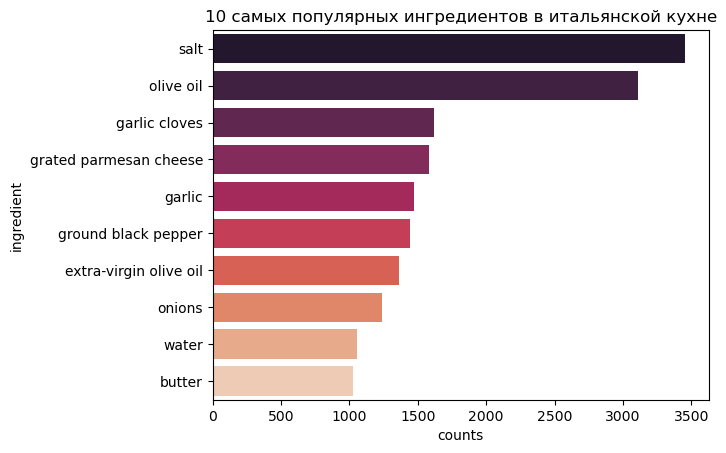

In [19]:
plt.title('10 самых популярных ингредиентов в итальянской кухне')
sns.barplot(data=spanish_cuisine, x='counts', y='ingredient', palette='rocket');

In [20]:
japanese_cuisine = dataframe[dataframe['cuisine'] == 'russian'].drop(columns=['id', 'cuisine']).sum(axis=0)\
    .sort_values(ascending=False).head(10)
japanese_cuisine = pd.DataFrame({'ingredient': japanese_cuisine.index, 'counts': japanese_cuisine.values})
japanese_cuisine

,ingredient,counts
0,salt,288
1,sugar,155
2,onions,145
3,all-purpose flour,123
4,sour cream,117
5,eggs,112
6,water,111
7,butter,104
8,unsalted butter,93
9,large eggs,85


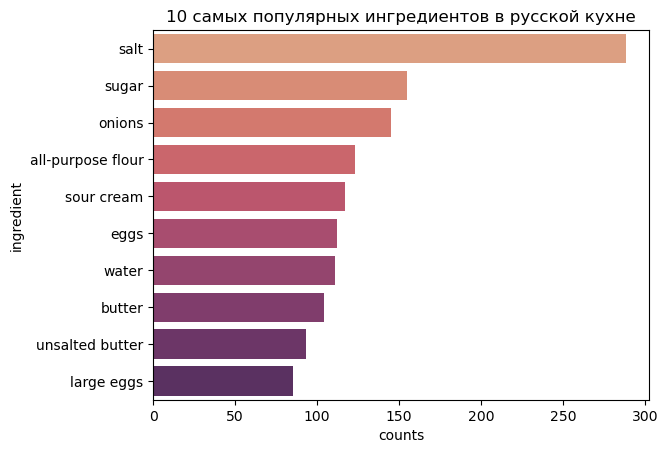

In [21]:
plt.title('10 самых популярных ингредиентов в русской кухне')
sns.barplot(data=japanese_cuisine, x='counts', y='ingredient', palette='flare');

In [18]:
chinese_cuisine = dataframe[dataframe['cuisine'] == 'chinese'].drop(columns=['id', 'cuisine']).sum(axis=0)\
    .sort_values(ascending=False).head(10)
chinese_cuisine = pd.DataFrame({'ingredient': chinese_cuisine.index, 'counts': chinese_cuisine.values})
chinese_cuisine

,ingredient,counts
0,soy sauce,1363
1,sesame oil,915
2,salt,907
3,corn starch,906
4,sugar,824
5,garlic,763
6,water,762
7,green onions,628
8,vegetable oil,602
9,scallions,591


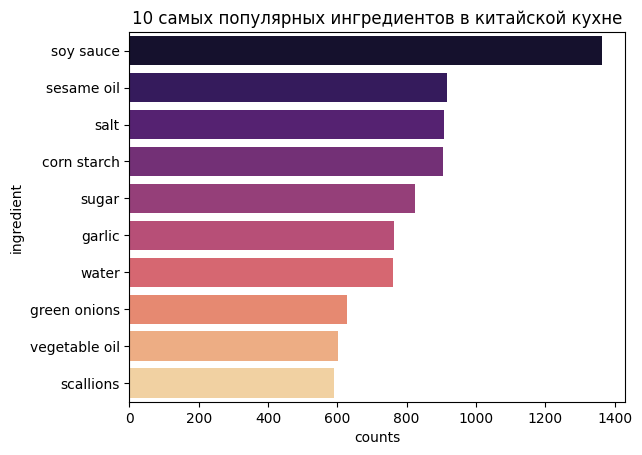

In [19]:
plt.title('10 самых популярных ингредиентов в китайской кухне')
sns.barplot(data=chinese_cuisine, x='counts', y='ingredient', palette='magma');

Самый популярный не соль, а соевый соус

In [20]:
indian_cuisine = dataframe[dataframe['cuisine'] == 'indian'].drop(columns=['id', 'cuisine']).sum(axis=0)\
    .sort_values(ascending=False).head(10)
indian_cuisine = pd.DataFrame({'ingredient': indian_cuisine.index, 'counts': indian_cuisine.values})
indian_cuisine

,ingredient,counts
0,salt,1934
1,onions,1195
2,garam masala,862
3,water,820
4,ground turmeric,728
5,garlic,726
6,cumin seed,697
7,ground cumin,683
8,vegetable oil,593
9,oil,546


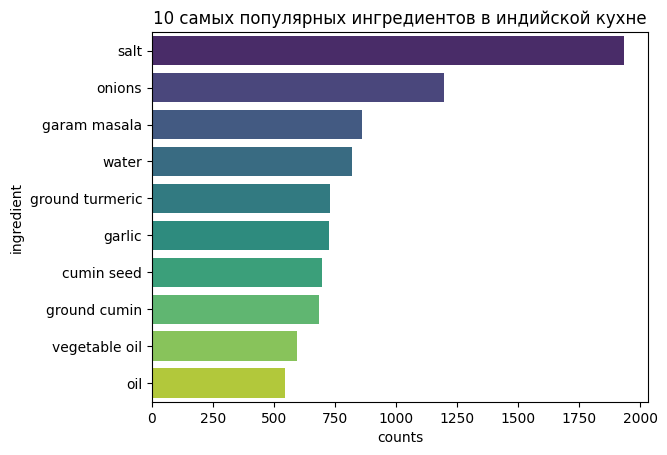

In [21]:
plt.title('10 самых популярных ингредиентов в индийской кухне')
sns.barplot(data=indian_cuisine, x='counts', y='ingredient', palette='viridis');

Самый популярный ингредиент - это соль, но на третьем месте есть индийская приправа - гарам масала.

## Кодирование таргета, разделение данных на train и test части.

In [22]:
label_encoder = LabelEncoder()
label_encoder.fit(dataframe['cuisine'])
dataframe['cuisine'] = label_encoder.transform(dataframe['cuisine'])

In [23]:
dataframe

,id,cuisine,acorn squash,black trumpet mushrooms,chinese wolfberries,macarons,boneless pork shoulder,peeled prawns,sweet gherkin,barley,...,minced peperoncini,mixed nuts,chopped hazelnuts,Dole Seven Lettuces,seasoning rub,grated jack cheese,lime peel,cooked turkey,rib-eye roast,salted anchovies
0,10259,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
features = dataframe.drop(columns=['id', 'cuisine']).values
target  = dataframe['cuisine'].values

In [25]:
Train_features, Test_features, train_target, test_target = train_test_split(features, target, random_state=993,
                                                                            test_size=0.3, stratify=target)

In [26]:
Train_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
train_target

array([13, 19, 16, ...,  7, 18,  2])

Был использован stratify так как распределение классов неравномерное.\
Теперь всё готово для обучения моделей.

## Обучение моделей

Для начала попробуем обучить логистическую регрессию. Простую линейную модель для задачи классификации.

In [71]:
log_reg = LogisticRegression(n_jobs=-1)
log_reg.fit(Train_features, train_target)
predicted_values = log_reg.predict(Test_features)
accuracy_score(predicted_values, test_target)

0.7733176904382804

И логистическую регрессию с l1 регуляризацией.

In [72]:
log_reg_with_l1_regularization = LogisticRegression(solver='liblinear', penalty='l1')
log_reg_with_l1_regularization.fit(Train_features, train_target) 
predicted_values = log_reg_with_l1_regularization.predict(Test_features)
accuracy_score(predicted_values, test_target)

0.7677030084639236

Также обучим простое дерево решений с помощью перебора гиперпараметров по сетке

In [33]:
tree = DecisionTreeClassifier()
grid_classificator = GridSearchCV(tree, param_grid={'max_depth': [10, 25, 50]})
grid_classificator.fit(Train_features, train_target)
tree = grid_classificator.best_estimator_
predicted_values = tree.predict(Test_features)
accuracy_score(predicted_values, test_target)

0.5482276041230202

In [34]:
grid_classificator.best_params_

{'max_depth': 50}

Это оптимальная глубина дерева.\
Можно и дальше подбирать гиперпараметры, но из-за большой размерности задачи это происходит очень долго, так как tree ищет оптимальное разделение по колонкам фичей, которых 6714.

## Результаты

В данном задании была выполнена предобработка и анализ данных, обучены четыре модели для решения задачи классификации на 20 классов. \
Самый лучший accuracy score дала модель простой логистической регрессии: 0.773.\
Логистическая регрессия с L1 регуляризацией, показала score хуже чем регрессия без регуляризации: 0.768.\
Решающее дерево с глубиной 50 дал accuracy score равный 0.548.\
